In [2]:
#loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from sklearn.model_selection import train_test_split

In [3]:
#loading data
df1=pd.read_csv('../../../Downloads/bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [6]:
df1['area_type'].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


## 1. Data cleaning

In [7]:
# dropping availability,society,balcony,area_type columns
df2=df1.drop(columns=['availability','society','balcony','area_type'],axis='columns')

In [8]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [9]:
# Dealing with NA Values
df2.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [10]:
df3=df2.dropna()

In [11]:
df3.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [12]:
df3.shape

(13246, 5)

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### Feature Engineering
- Creating the BHK feature from the Size column

In [14]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

/tmp/ipython-input-2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [16]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


#### Checking for invalid values in total_sqft



In [20]:
df3[~df3['total_sqft'].apply(is_float)]['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

In [21]:
df3['total_sqft']=df3['total_sqft'].str.strip()

/tmp/ipython-input-189814146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['total_sqft']=df3['total_sqft'].str.strip()


In [22]:
def range_to_mean(x):
  if '-' in x:
    lst=x.split('-')
    lst_new=[s.strip() for s in lst]
    avg=np.mean(list(map(float,lst_new)))
    return avg
  try:
    return float(x)
  except:
    return x

In [23]:
df4=df3.copy()

In [24]:
#converting ex.'1408 - 1455' into valid integer by taking mean of two numbers
df4['total_sqft']=df3['total_sqft'].apply(range_to_mean)

In [25]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
df4.loc[410]

,410
location,Kengeri
size,1 BHK
total_sqft,34.46Sq. Meter
bath,1.0
price,18.5
bhk,1


#### Conversion of Different Units to Square Feet

In [27]:
df4[~df4['total_sqft'].apply(is_float)]['total_sqft'].unique()

array(['34.46Sq. Meter', '4125Perch', '1000Sq. Meter', '1100Sq. Yards',
       '5.31Acres', '30Acres', '716Sq. Meter', '1500Sq. Meter',
       '142.61Sq. Meter', '1574Sq. Yards', '361.33Sq. Yards',
       '117Sq. Yards', '3040Sq. Meter', '500Sq. Yards', '167Sq. Meter',
       '315Sq. Yards', '3Cents', '188.89Sq. Yards', '204Sq. Meter',
       '45Sq. Yards', '133.3Sq. Yards', '78.03Sq. Meter', '122Sq. Yards',
       '84.53Sq. Meter', '2.09Acres', '24Guntha', '697Sq. Meter',
       '1500Cents', '132Sq. Yards', '2Acres', '1100Sq. Meter', '15Acres',
       '1.26Acres', '151.11Sq. Yards', '1Grounds', '2940Sq. Yards',
       '45.06Sq. Meter', '1.25Acres', '86.72Sq. Meter', '38Guntha',
       '6Acres', '120Sq. Yards', '24Sq. Meter', '142.84Sq. Meter',
       '300Sq. Yards'], dtype=object)

In [28]:
#converting sq_meter to sq_ft
def sq_meter_to_sq_ft(x):
  if isinstance(x,str):
    if 'Sq. Meter' in x:
      sq_me=float(x.split('Sq. Me')[0])
      return sq_me * 10.7639
    else:
      return x
  else:
    return x

In [29]:
sq_meter_to_sq_ft('34.46Sq. Meter')

370.923994

In [30]:
df5=df4.copy()

In [31]:
df5['total_sqft']=df4['total_sqft'].apply(sq_meter_to_sq_ft)

In [32]:
df5[~df5['total_sqft'].apply(is_float)]['total_sqft'].unique()

array(['4125Perch', '1100Sq. Yards', '5.31Acres', '30Acres',
       '1574Sq. Yards', '361.33Sq. Yards', '117Sq. Yards', '500Sq. Yards',
       '315Sq. Yards', '3Cents', '188.89Sq. Yards', '45Sq. Yards',
       '133.3Sq. Yards', '122Sq. Yards', '2.09Acres', '24Guntha',
       '1500Cents', '132Sq. Yards', '2Acres', '15Acres', '1.26Acres',
       '151.11Sq. Yards', '1Grounds', '2940Sq. Yards', '1.25Acres',
       '38Guntha', '6Acres', '120Sq. Yards', '300Sq. Yards'], dtype=object)

In [33]:
df5[df5['total_sqft']=='188.89Sq. Yards']

,location,size,total_sqft,bath,price,bhk
5537,Frazer Town,3 BHK,188.89Sq. Yards,3.0,180.0,3


In [34]:
#converting sq_yards to sq_ft
def sq_yards_to_sq_ft(x):
  if isinstance(x,str):
    if 'Sq. Yards' in x:
      sq_yards=float(x.split('Sq. Yar')[0])
      return sq_yards * 9
    else:
      return x
  else:
    return x

In [35]:
sq_yards_to_sq_ft('1100Sq. Yards')

9900.0

In [36]:
df6=df5.copy()
df6['total_sqft']=df5['total_sqft'].apply(sq_yards_to_sq_ft)

In [37]:
df6[~df6['total_sqft'].apply(is_float)]['total_sqft'].unique()

array(['4125Perch', '5.31Acres', '30Acres', '3Cents', '2.09Acres',
       '24Guntha', '1500Cents', '2Acres', '15Acres', '1.26Acres',
       '1Grounds', '1.25Acres', '38Guntha', '6Acres'], dtype=object)

In [38]:
df6.loc[5537]

,5537
location,Frazer Town
size,3 BHK
total_sqft,1700.01
bath,3.0
price,180.0
bhk,3


In [39]:
#converting acres to sq_ft
def acres_to_sq_ft(x):
  if isinstance(x,str):
    if 'Acres' in x:
      # print(x)
      acres=float(x.split('Ac')[0])
      return acres * 43560
    else:
      return x
  else:
    return x

In [40]:
df5[df5['total_sqft']=='2.09Acres']

,location,size,total_sqft,bath,price,bhk
6333,Harohalli,2 Bedroom,2.09Acres,2.0,200.0,2


In [41]:
acres_to_sq_ft('2.09Acres')

91040.4

In [42]:
df7=df6.copy()
df7['total_sqft']=df6['total_sqft'].apply(acres_to_sq_ft)

In [43]:
df7[~df7['total_sqft'].apply(is_float)]['total_sqft'].unique()

array(['4125Perch', '3Cents', '24Guntha', '1500Cents', '1Grounds',
       '38Guntha'], dtype=object)

In [44]:
df7.loc[6333]

,6333
location,Harohalli
size,2 Bedroom
total_sqft,91040.4
bath,2.0
price,200.0
bhk,2


In [45]:
#converting Perch,Cents,Guntha,Ground to sq_ft
def conv_to_sq_ft(x):
  if isinstance(x,str):
    if 'Perch' in x:
      perch=float(x.split('Pe')[0])
      return perch * 272.25
    elif 'Cents' in x:
      return float(x.split('Ce')[0]) * 435.6
    elif 'Guntha' in x:
      return float(x.split('Gun')[0]) * 1089
    elif 'Ground' in x:
      return float(x.split('Gro')[0]) * 2400
    else:
      return x
  else:
    return x

In [46]:
df7[df7['total_sqft'].isin(['4125Perch', '3Cents', '24Guntha', '1500Cents', '1Grounds',
       '38Guntha'])]

,location,size,total_sqft,bath,price,bhk
648,Arekere,9 Bedroom,4125Perch,9.0,265.0,9
5453,Kannur,6 Bedroom,3Cents,6.0,75.0,6
6552,5 Bedroom Farm House in Lakshmipura,5 Bedroom,24Guntha,6.0,550.0,5
7001,Thyagaraja Nagar,8 Bedroom,1500Cents,6.0,290.0,8
9423,Ramamurthy Nagar,1 Bedroom,1Grounds,1.0,48.0,1
11320,Arishinakunte,1 Bedroom,38Guntha,1.0,170.0,1


In [47]:
conv_to_sq_ft('3Cents')

1306.8000000000002

In [48]:
df8=df7.copy()
df8['total_sqft']=df7['total_sqft'].apply(conv_to_sq_ft)

In [49]:
df8[df8['total_sqft'].isin(['4125Perch', '3Cents', '24Guntha', '1500Cents', '1Grounds',
       '38Guntha'])]

,location,size,total_sqft,bath,price,bhk


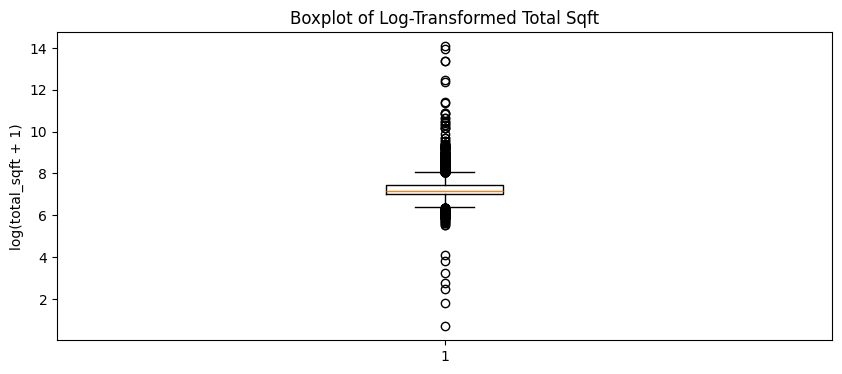

In [50]:
#looking for outliers after unit conversions
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.boxplot(np.log1p(df8['total_sqft']))
plt.title("Boxplot of Log-Transformed Total Sqft")
plt.ylabel("log(total_sqft + 1)")
plt.show()

In [51]:
df8['total_sqft'].describe()

,total_sqft
count,1.324600e+04
mean,1.909255e+03
std,1.732484e+04
min,1.000000e+00
25%,1.100000e+03
50%,1.275000e+03
75%,1.678750e+03
max,1.306800e+06


#### Filtering Out Properties Larger Than 10,000 Sq Ft

In [52]:
prop_less_than_10k_sqft=df8[~(df8.total_sqft>10000)]

In [53]:
df9=prop_less_than_10k_sqft.copy()

### Adding new feature as price per square feet - (Feature Engineering)

In [54]:
df9['price_per_sqft']=df8['price']*100000/df8['total_sqft']

In [55]:
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [56]:
len(df9['location'].unique())

1295

In [57]:
df9['location']=df9['location'].str.strip()

In [58]:
len(df9['location'].unique())

1284

In [59]:
location_stats=df9.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,533
Sarjapur Road,392
Electronic City,304
Kanakpura Road,264
Thanisandra,236
...,...
manyata,1
manyata tech park,1
1 Immadihalli,1


In [60]:
loc_stat_df=location_stats.reset_index(name='count')

In [61]:
loc_other=list(loc_stat_df[loc_stat_df['count']<=10]['location'].values)

In [62]:
location_stats[location_stats <= 10]

,location
location,
Dairy Circle,10
Thyagaraja Nagar,10
Basapura,10
Kalkere,10
Nagappa Reddy Layout,10
...,...
manyata,1
manyata tech park,1
1 Immadihalli,1


In [63]:
df10=df9.copy()

- Tag locations with <10 data points as "Other" to reduce categories before one-hot encoding (Dimensionality Reduction)

In [64]:
def map_other_loc(x):
  if x in loc_other:
    return 'other'
  return x

In [65]:
map_other_loc('Whitefield')

'Whitefield'

In [66]:
df10['location']=df9['location'].apply(lambda x: 'other' if x in loc_other else x)

In [67]:
len(df10['location'].unique())

241

### Outlier Removal Using Business Logic
- Removed outliers where sqft per BHK < 300, as unusually small apartments are unrealistic

In [68]:
outliers_1=df10[(df10.total_sqft/df10.bhk)<300].index.values

In [69]:
outliers_1.shape

(748,)

In [70]:
df10.shape

(13205, 7)

In [71]:
df11=df10.copy()

In [72]:
df11.drop(outliers_1,inplace=True)

In [73]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [74]:
df11.shape

(12457, 7)

In [75]:
df11.price_per_sqft.describe()

,price_per_sqft
count,"12,457.00"
mean,"6,305.80"
std,"4,158.44"
min,454.55
25%,"4,210.53"
50%,"5,294.12"
75%,"6,917.00"
max,"176,470.59"


In [76]:
df11.groupby('location')

### Outlier Removal Using Standard Deviation and Mean

In [77]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df11.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    std=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

In [78]:
df12=remove_pps_outliers(df11)

In [79]:
df11.shape

(12457, 7)

In [80]:
df12

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,"2,850.00",4.00,428.00,4,"15,017.54"
1,1st Block Jayanagar,3 BHK,"1,630.00",3.00,194.00,3,"11,901.84"
2,1st Block Jayanagar,3 BHK,"1,875.00",2.00,235.00,3,"12,533.33"
3,1st Block Jayanagar,3 BHK,"1,200.00",2.00,130.00,3,"10,833.33"
4,1st Block Jayanagar,2 BHK,"1,235.00",2.00,148.00,2,"11,983.81"
...,...,...,...,...,...,...,...
10247,other,2 BHK,"1,353.00",2.00,110.00,2,"8,130.08"
10248,other,1 Bedroom,812.00,1.00,26.00,1,"3,201.97"
10249,other,3 BHK,"1,440.00",2.00,63.93,3,"4,439.58"
10250,other,2 BHK,"1,075.00",2.00,48.00,2,"4,465.12"


In [81]:
df12.loc[1371]

,1371
location,Bommenahalli
size,4 Bedroom
total_sqft,"1,632.00"
bath,3.00
price,140.00
bhk,4
price_per_sqft,"8,578.43"


In [82]:
df11.shape[0]-df12.shape[0] #rows(outliers removed)

2205

#### Removing Anomalous BHK Price Patterns

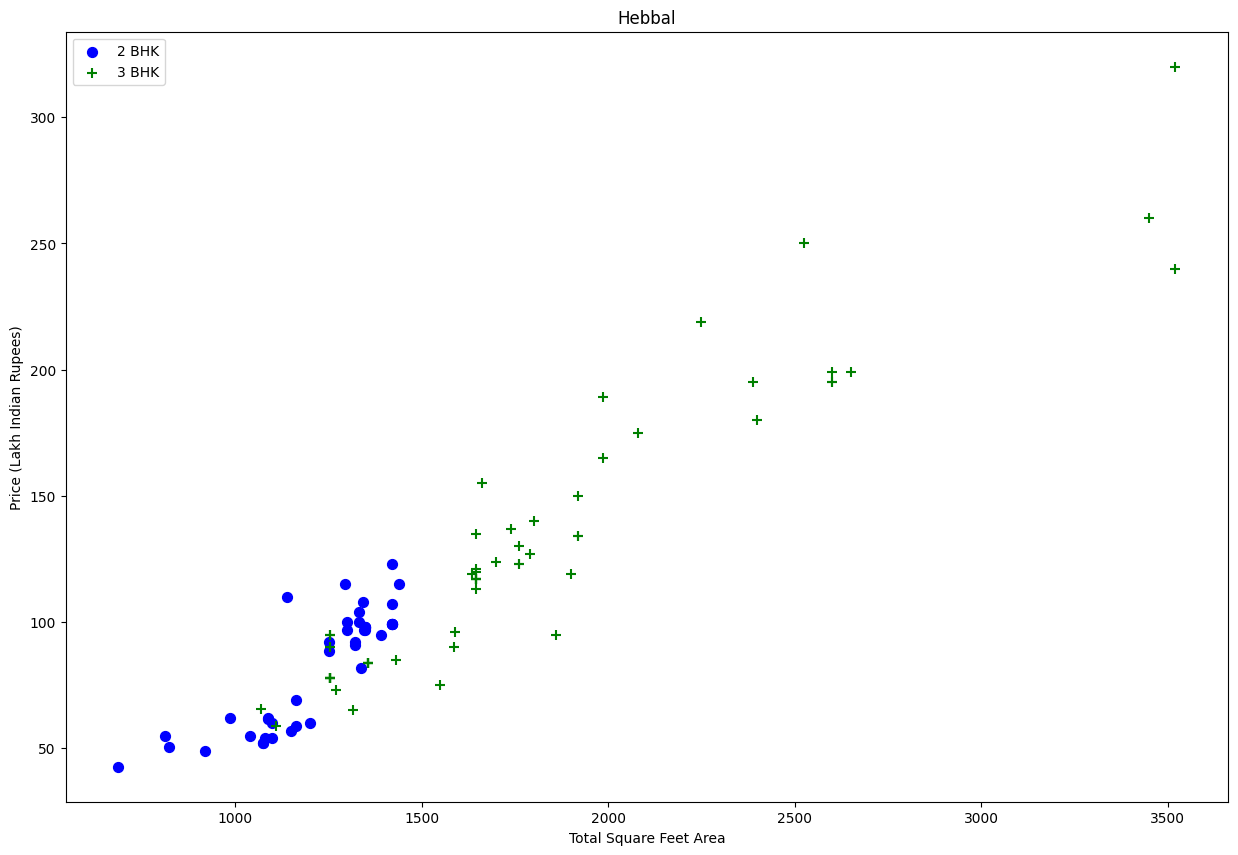

In [83]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df12,"Hebbal")

- We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

- {
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
- Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [84]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            # print(bhk_stats)
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df13 = remove_bhk_outliers(df12)
df13.shape

(7318, 7)

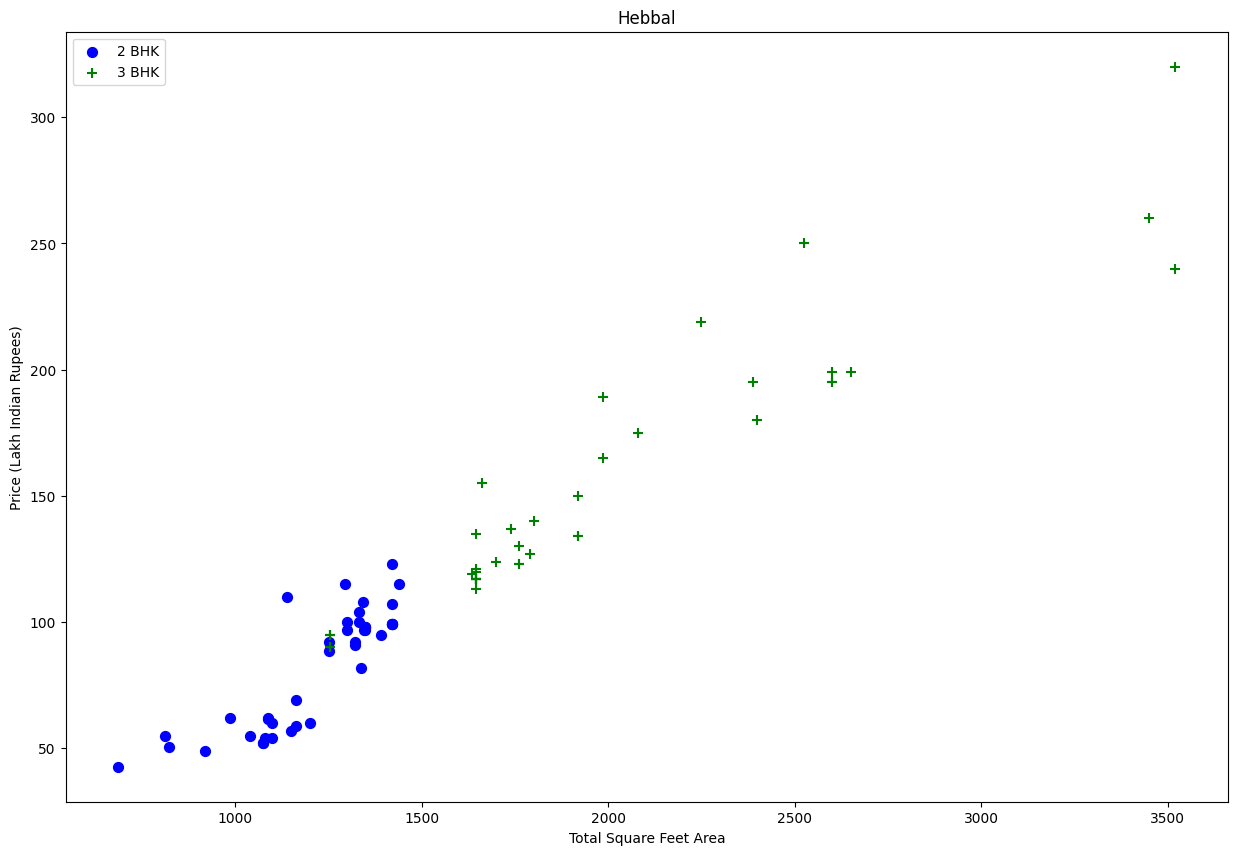

In [85]:
plot_scatter_chart(df13,"Hebbal")

Text(0, 0.5, 'Count')

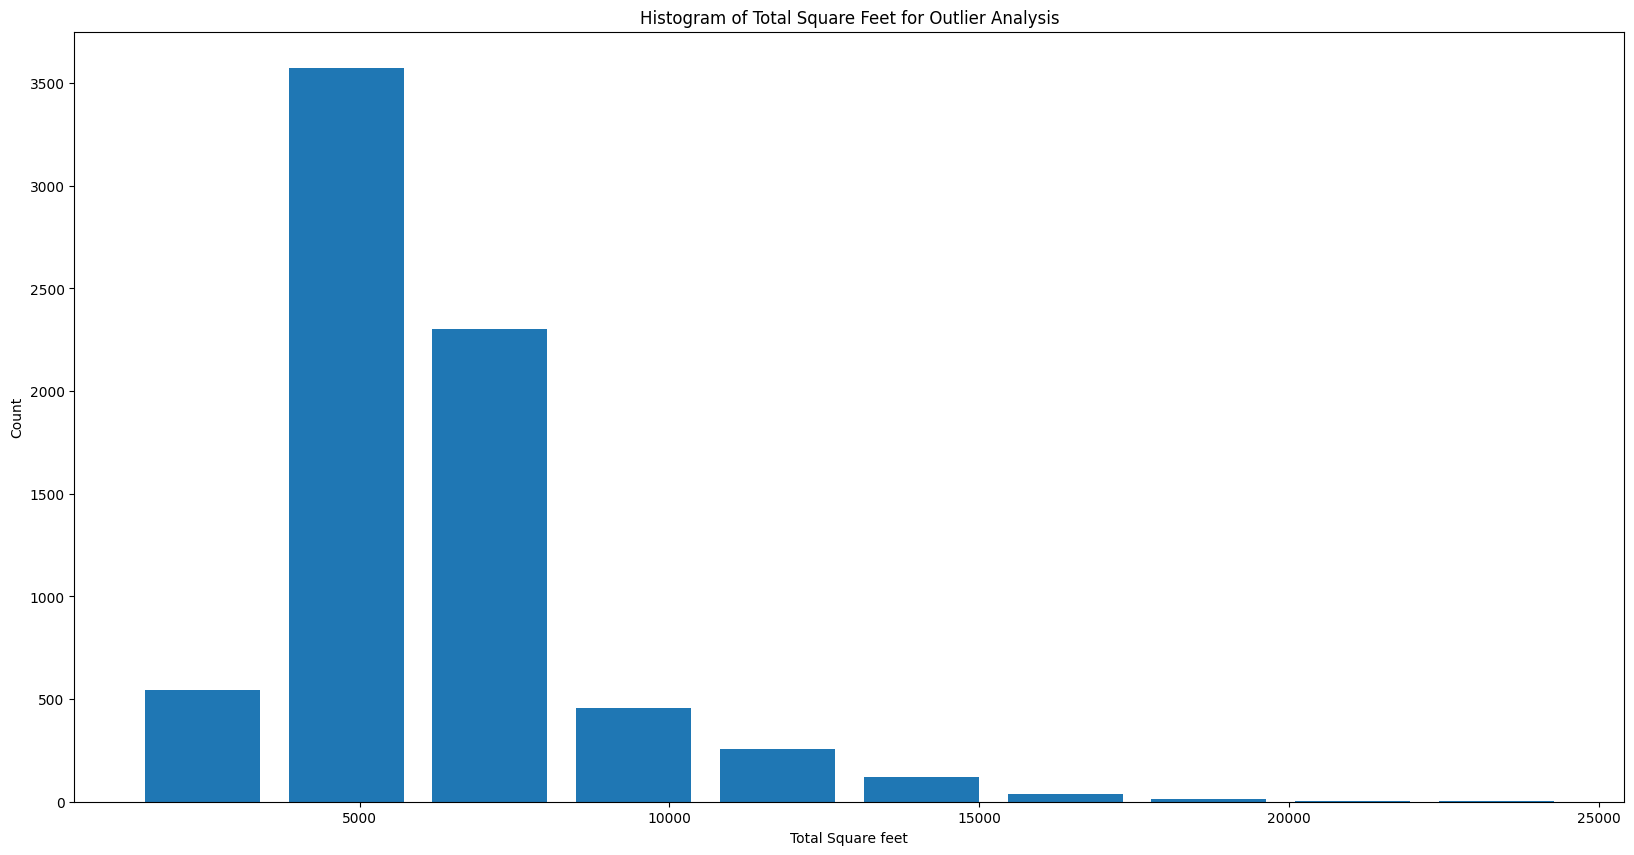

In [86]:
# checking for outliers using histogram for Total Square feet
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df13.price_per_sqft,rwidth=0.8)
plt.title('Histogram of Total Square Feet for Outlier Analysis')
plt.xlabel('Total Square feet')
plt.ylabel('Count')

In [87]:
df13.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [88]:
df13[df13.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5284,Neeladri Nagar,10 BHK,"4,000.00",12.00,160.00,10,"4,000.00"
8579,other,16 BHK,"10,000.00",16.00,550.00,16,"5,500.00"
9315,other,11 BHK,"6,000.00",12.00,150.00,11,"2,500.00"
9647,other,13 BHK,"5,425.00",13.00,275.00,13,"5,069.12"


Text(0, 0.5, 'Count')

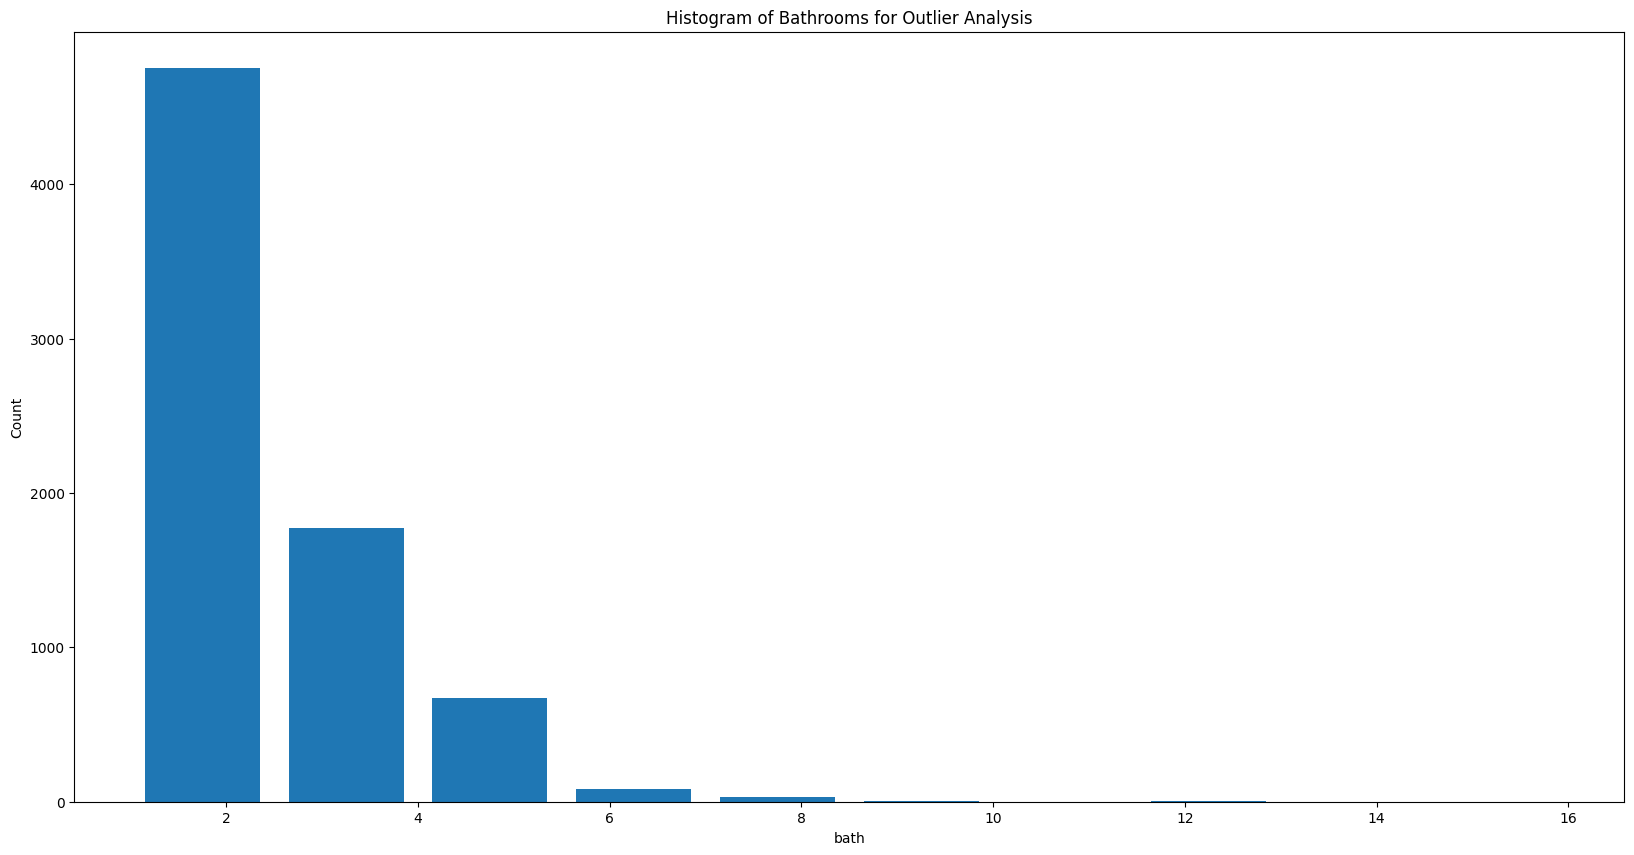

In [115]:
#checking for outliers using histogram for bathroom
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df13.bath,rwidth=0.8)
plt.title('Histogram of Bathrooms for Outlier Analysis')
plt.xlabel('bath')
plt.ylabel('Count')

#### Removing Entries Where Bathrooms > (BHK + 2)

In [90]:
df14=df13[~(df13.bath>df13.bhk+2)]

In [91]:
df14.shape

(7315, 7)

In [92]:
df15=df14.drop(columns=['size','price_per_sqft'],axis=1)

In [93]:
df15

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,"2,850.00",4.00,428.00,4
1,1st Block Jayanagar,"1,630.00",3.00,194.00,3
2,1st Block Jayanagar,"1,875.00",2.00,235.00,3
3,1st Block Jayanagar,"1,200.00",2.00,130.00,3
4,1st Block Jayanagar,"1,235.00",2.00,148.00,2
...,...,...,...,...,...
10243,other,"1,200.00",2.00,70.00,2
10244,other,"1,800.00",1.00,200.00,1
10247,other,"1,353.00",2.00,110.00,2
10248,other,812.00,1.00,26.00,1


### One-Hot Encoding

In [94]:
# Applying One-Hot Encoding on location column
dummies=pd.get_dummies(df15.location,dtype=int)

In [95]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
#Concatenating the Original DataFrame with Dummy Variables and Dropping Unnecessary Columns ex.Other
df16=pd.concat([df15,dummies.drop('other',axis='columns')],axis='columns')

In [97]:
df16

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,"2,850.00",4.00,428.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,"1,630.00",3.00,194.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,"1,875.00",2.00,235.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,"1,200.00",2.00,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,"1,235.00",2.00,148.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,other,"1,200.00",2.00,70.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10244,other,"1,800.00",1.00,200.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10247,other,"1,353.00",2.00,110.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10248,other,812.00,1.00,26.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df17=df16.drop('location',axis='columns')

In [99]:
df17.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,"2,850.00",4.00,428.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"1,630.00",3.00,194.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"1,875.00",2.00,235.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df17.shape

(7315, 244)

In [101]:
#creating X and y variable
X=df17.drop('price',axis='columns')

In [102]:
y=df17.price

In [103]:
y.head()

,price
0,428.00
1,194.00
2,235.00
3,130.00
4,148.00


##2. Train–Test Split

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [105]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.8618022653772265

## 3. Model Training

In [106]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [107]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.85525148, 0.86675933, 0.87066387, 0.85693039, 0.85080552])

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [109]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [110]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },

        'lasso': {
            'model': Lasso(max_iter=5000),
            'params': {
                'alpha': [0.1, 1, 10]
            }
        },

        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'max_depth': [5, 10],
                'min_samples_split': [2, 5]
            }
        },

        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'max_depth': [10, None]
            }
        },

        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'learning_rate': [0.05, 0.1],
                'n_estimators': [50, 100]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(
            config['model'],
            config['params'],
            cv=cv,
            scoring='r2',
            n_jobs=-1
        )
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

## 4. Model Comparison and Selection

In [111]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.86,{}
1,lasso,0.81,{'alpha': 0.1}
2,decision_tree,0.80,"{'max_depth': 10, 'min_samples_split': 2}"
3,random_forest,0.84,"{'max_depth': None, 'n_estimators': 100}"
4,gradient_boosting,0.85,"{'learning_rate': 0.1, 'n_estimators': 100}"


- Here linear regression model give the highest r2-score will choose it with default setting.

## 5. Cross-validation

In [112]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.85525148, 0.86675933, 0.87066387, 0.85693039, 0.85080552])

## 6. Model Export

In [113]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
  pickle.dump(lr_model,f)

In [114]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))